In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("D:\giri\desktop\Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [2]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


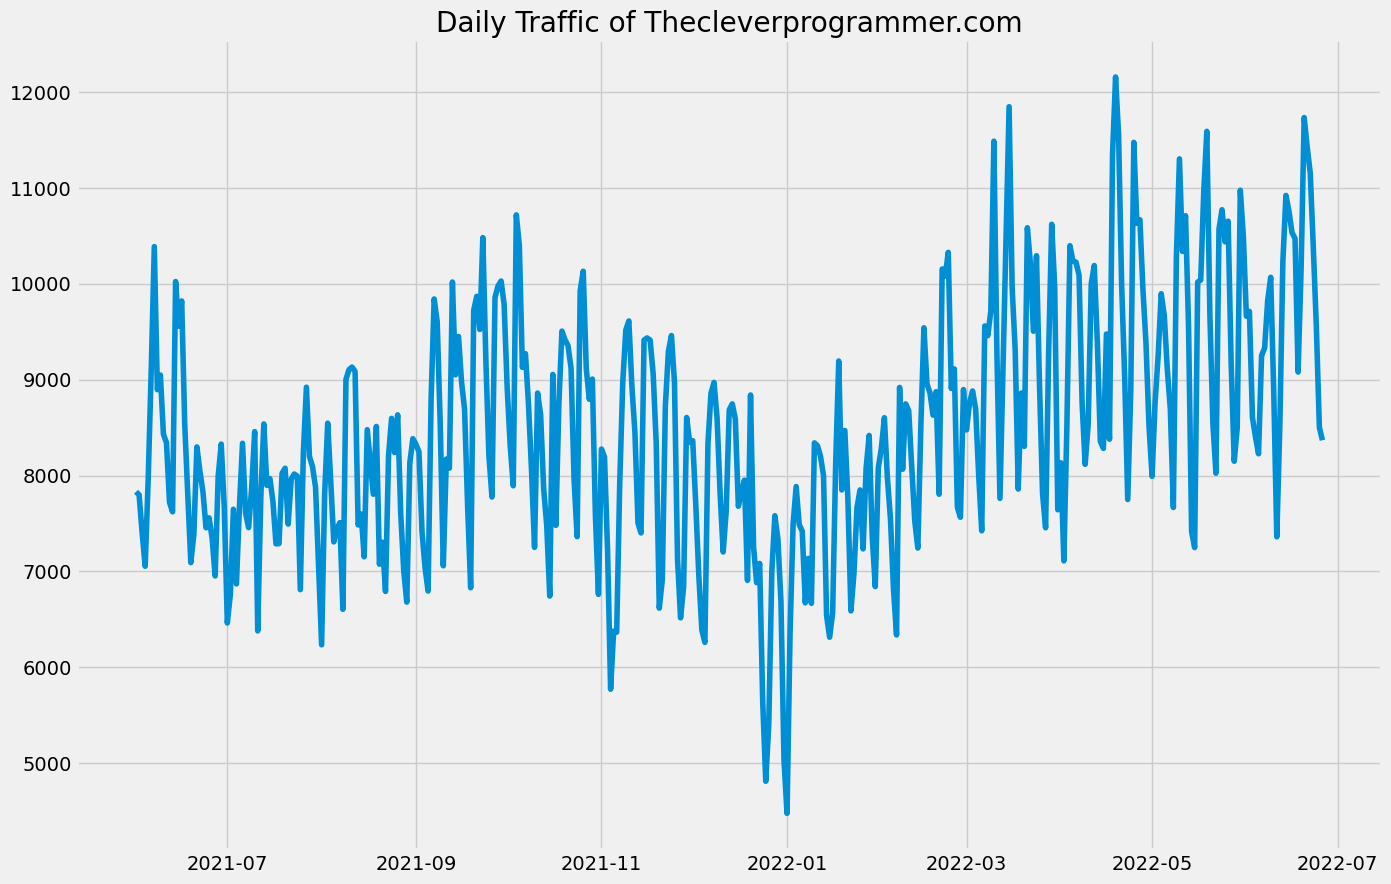

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

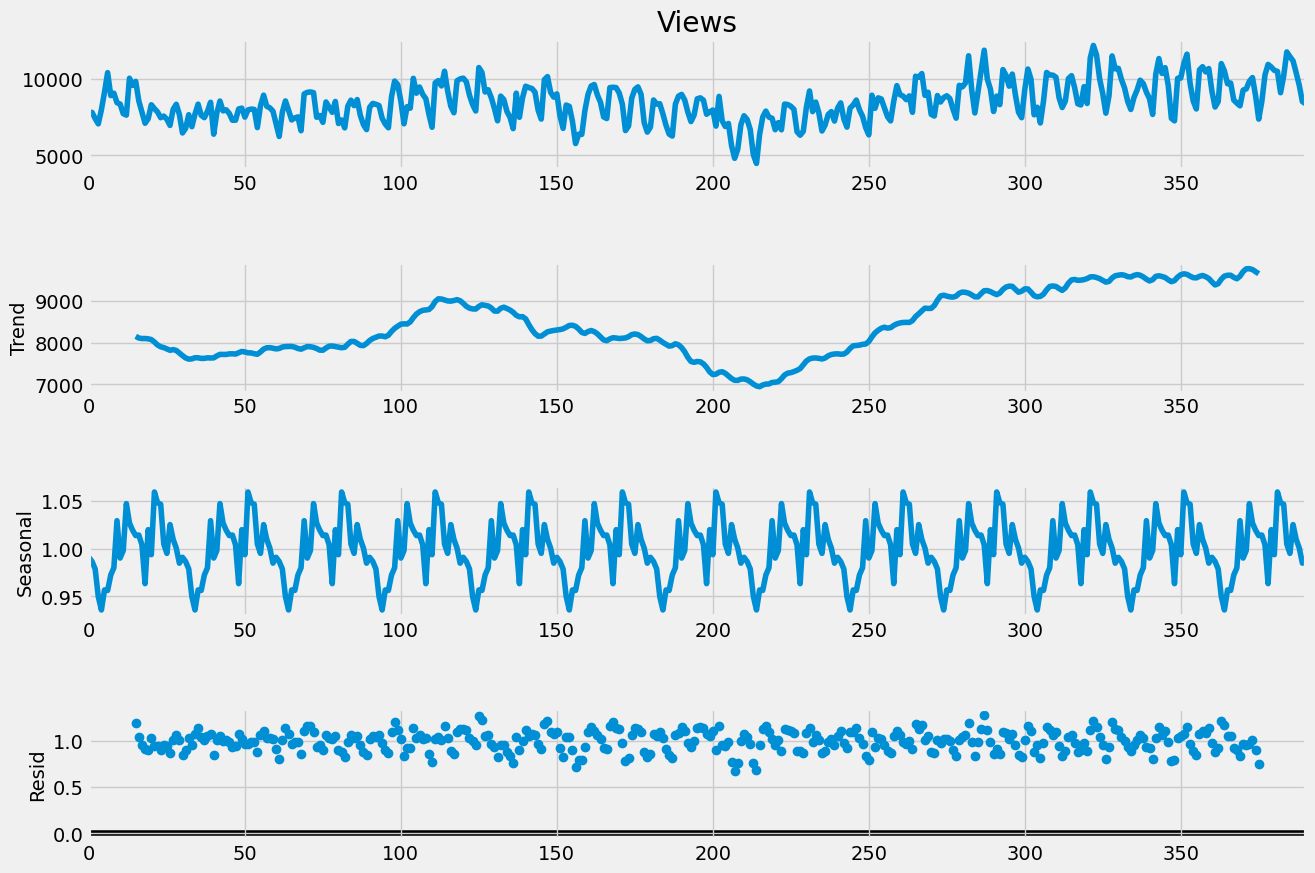

In [9]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

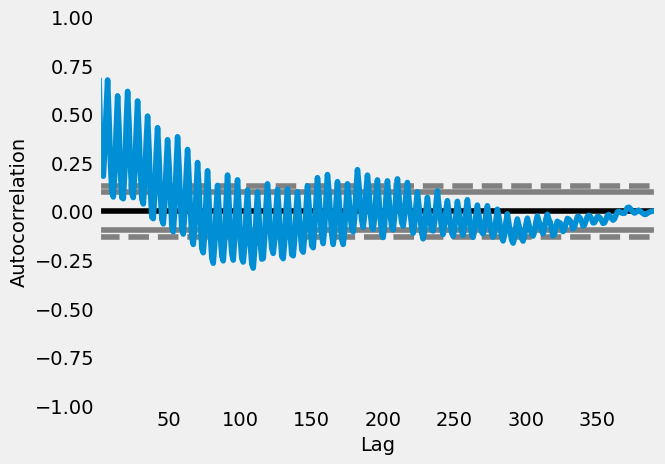

In [10]:
pd.plotting.autocorrelation_plot(data["Views"])

C:\Users\girid\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


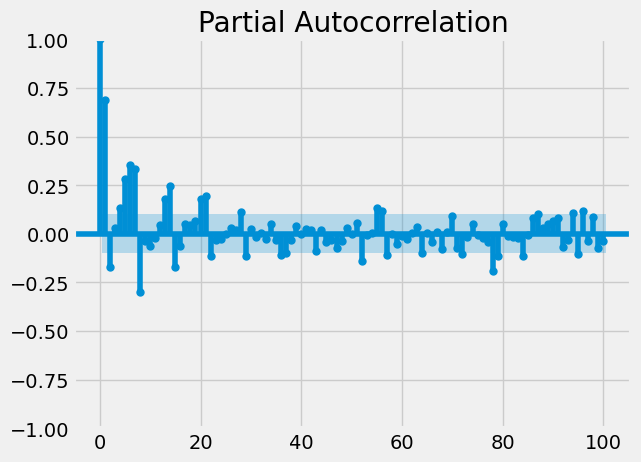

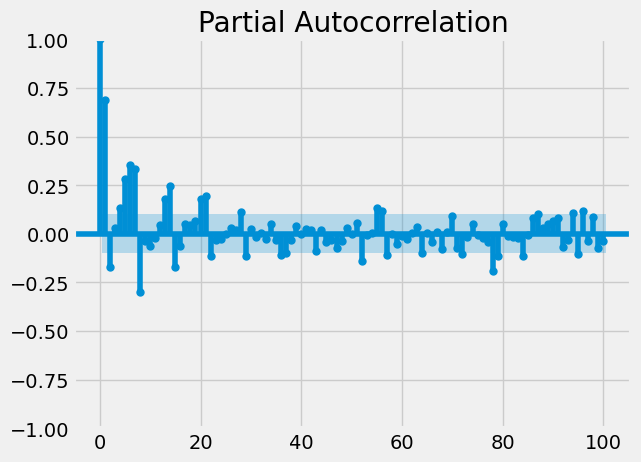

In [11]:
plot_pacf(data["Views"], lags = 100)

In [12]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\girid\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\girid\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.132
Date:                            Tue, 30 May 2023   AIC                           6228.263
Time:                                    12:42:37   BIC                           6287.286
Sample:                                         0   HQIC                          6251.688
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7902      0.131      6.049      0.000       0.534       1.046
ar.L2         -0.7882      0.136   

In [13]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9854.879557
392    10766.424970
393    10724.681676
394     9852.401317
395     8759.942725
396     8201.236157
397     8903.187296
398     9675.716250
399    10263.006389
400    10603.971251
401     9859.492486
402     9349.881630
403     9011.676674
404     9043.453543
405    10500.549419
406    10990.381447
407    10900.923881
408    10089.325499
409     9437.155869
410     8602.881987
411     9142.942521
412    10351.991454
413    10603.896944
414    10799.980416
415    10262.340685
416     9431.457789
417     8986.465896
418     9119.026024
419     9868.519990
420    10224.257347
421    10725.999917
422     9912.435878
423     9532.019702
424     9004.233642
425     8781.445884
426    10106.834540
427    10837.552085
428    10913.520367
429    10405.211970
430     9432.036991
431     8652.412811
432     8668.745910
433    10027.866939
434    10505.006803
435    10855.154594
436    10484.011912
437     9334.135896
438     9141.070002
439     9309.052977
440    10260.136399
